[1] "Ett streamgraph-diagram bygger på en datavisualiseringsteknik som används för att visa förändringar i fördelningen av data över en tidsperiod. Det är en variant av ett area-diagram där data staplas ovanpå varandra och fyller utrymmet under en kurva som representerar tidslinjen. Huvudsyftet med en streamgraph är att visa trender och mönster över tid för olika kategorier eller variabler. Varje kategori representeras av en färgad yta i diagrammet, och höjden på området vid varje tidpunkt representerar värdet av kategorin vid den tiden. Streamgraph-diagrammet är särskilt användbart för att visualisera förändringar i flera kategoriers bidrag till en helhet över tid. Diagrammet kan användas för att analysera och förstå hur fördelningen av data förändras över tid, och att identifiera mönster, trender och periodiska variationer. Streamgraph-diagrammet är ofta användbart inom områden som ekonomi (för att visualisera flöden av ekonomiska resurser över tid), klimatvetenskap (för att visualisera förändringar i vädermönster över säsonger), och sociala medier (för att  visualisera förändringar i användaraktivitet över tid)."

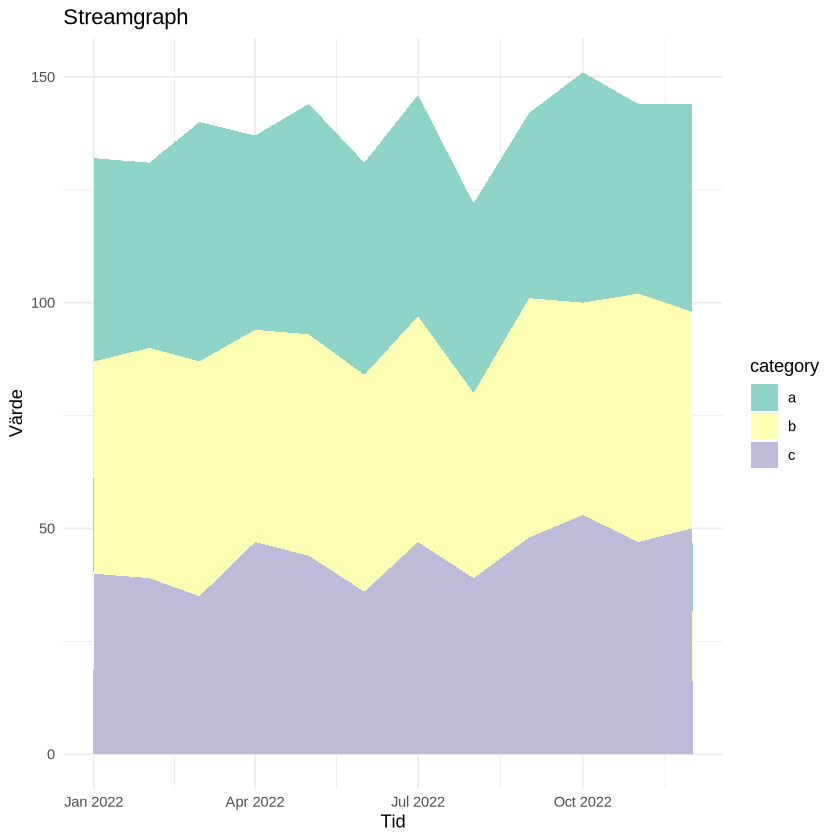

In [1]:
# ***********************************************************************************************
# Titel: Exempel på diagramtyper i R - STREAMGRAPH
# Beskrivning: Illustrera exempel med diagramtyper i R
# Skapad av: Frank Weideskog(frank.weideskog@scb.se), ID: SCBFRWE
# 2024-06-17 (SCBFRWE):En första version 
#*************************************************************************************************
# Rensar minnet i R
rm(list=ls())				
# ************************************************************************************************
#Installerar/aktiverar relevanta R-paket (R-packages):
suppressMessages({
  install.packages("ggplot2")
  library(ggplot2)
})   
# ************************************************************************************************

#STREAMGRAPH

# Skapa fiktiva data
set.seed(123)
data <- data.frame(
  time = rep(seq(as.Date("2022-01-01"), by = "month", length.out = 12), 3),
  category = rep(letters[1:3], each = 12),
  value = c(
    sample(10:20, 36, replace = TRUE),  # Uppdaterat för att tillåta ersättning
    sample(15:25, 36, replace = TRUE),  # Uppdaterat för att tillåta ersättning
    sample(5:15, 36, replace = TRUE)    # Uppdaterat för att tillåta ersättning
  )
)

# Beräkna stacked area
data <- aggregate(value ~ time + category, data = data, FUN = sum)
data <- data[order(data$time), ]
data <- transform(data, y_start = ave(value, time, FUN = function(x) c(0, head(cumsum(x), -1))))

# Skapa plot
ggplot(data, aes(x = time, y = value, fill = category)) +
  geom_area(position = "stack") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  labs(title = "Streamgraph", x = "Tid", y = "Värde")


text<- 'Ett streamgraph-diagram bygger på en datavisualiseringsteknik som används för att visa förändringar i fördelningen av data över en tidsperiod. Det är en variant av ett area-diagram där data staplas ovanpå varandra och fyller utrymmet under en kurva som representerar tidslinjen. Huvudsyftet med en streamgraph är att visa trender och mönster över tid för olika kategorier eller variabler. Varje kategori representeras av en färgad yta i diagrammet, och höjden på området vid varje tidpunkt representerar värdet av kategorin vid den tiden. Streamgraph-diagrammet är särskilt användbart för att visualisera förändringar i flera kategoriers bidrag till en helhet över tid. Diagrammet kan användas för att analysera och förstå hur fördelningen av data förändras över tid, och att identifiera mönster, trender och periodiska variationer. Streamgraph-diagrammet är ofta användbart inom områden som ekonomi (för att visualisera flöden av ekonomiska resurser över tid), klimatvetenskap (för att visualisera förändringar i vädermönster över säsonger), och sociala medier (för att  visualisera förändringar i användaraktivitet över tid).'
text